In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

c:\Users\m.mikowski\Anaconda3\envs\env1\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\m.mikowski\Anaconda3\envs\env1\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\m.mikowski\Anaconda3\envs\env1\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
weight = 0.3
bias = 0.9 
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X +bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [3]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

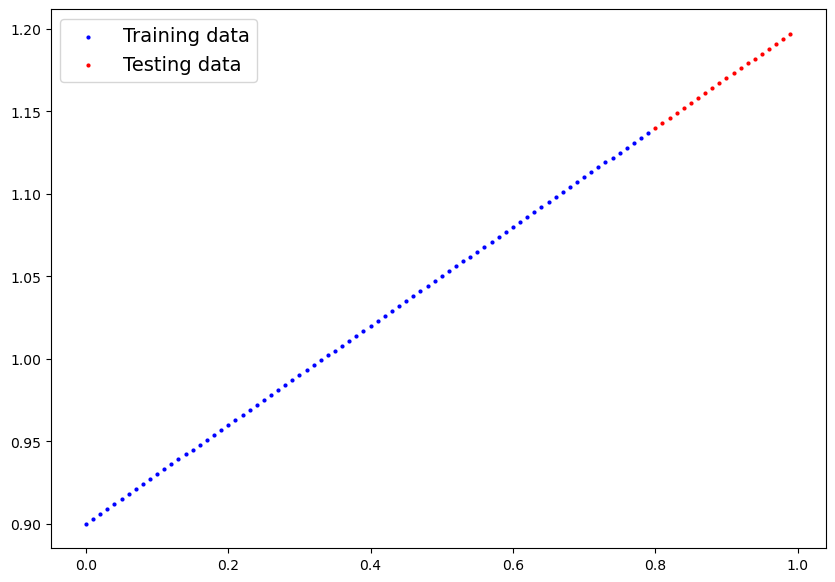

In [5]:
plot_predictions()

In [6]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [7]:
torch.manual_seed(42)
model = LinearModel()
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
with torch.inference_mode():
    y_preds = model(X_test)


y_preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])

In [9]:
len(X_test), len(y_preds)

(20, 20)

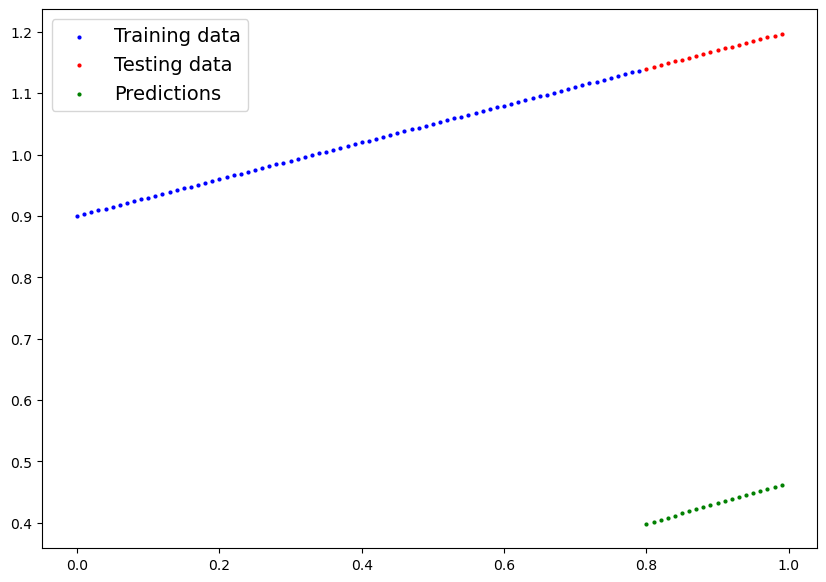

In [10]:
plot_predictions(predictions=y_preds)

In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)

In [12]:
torch.manual_seed(42)

epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch}, Train loss: {loss}, Test loss: {test_loss}')

Epoch: 0, Train loss: 0.7566978335380554, Test loss: 0.7248174548149109
Epoch: 20, Train loss: 0.5254928469657898, Test loss: 0.4541124403476715
Epoch: 40, Train loss: 0.2942880392074585, Test loss: 0.18340764939785004
Epoch: 60, Train loss: 0.07658576965332031, Test loss: 0.07274086028337479
Epoch: 80, Train loss: 0.05255373567342758, Test loss: 0.11581540107727051
Epoch: 100, Train loss: 0.045542728155851364, Test loss: 0.10467890650033951
Epoch: 120, Train loss: 0.03868866711854935, Test loss: 0.08938358724117279
Epoch: 140, Train loss: 0.03183453157544136, Test loss: 0.07408786565065384
Epoch: 160, Train loss: 0.024982359260320663, Test loss: 0.0581042543053627
Epoch: 180, Train loss: 0.018130185082554817, Test loss: 0.04212062805891037
Epoch: 200, Train loss: 0.011278990656137466, Test loss: 0.02579306997358799
Epoch: 220, Train loss: 0.004429381340742111, Test loss: 0.009467745199799538
Epoch: 240, Train loss: 0.00370177929289639, Test loss: 0.006489443592727184
Epoch: 260, Train

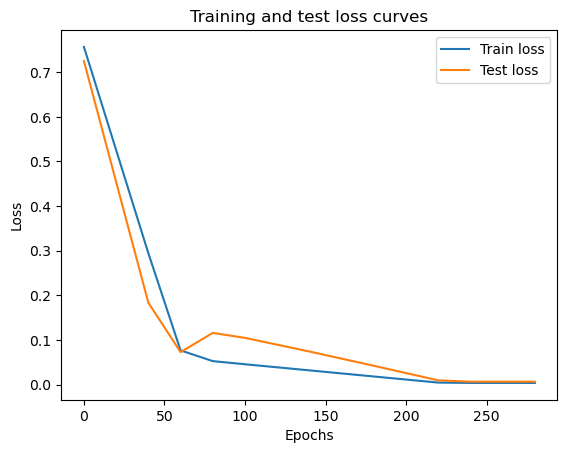

In [13]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

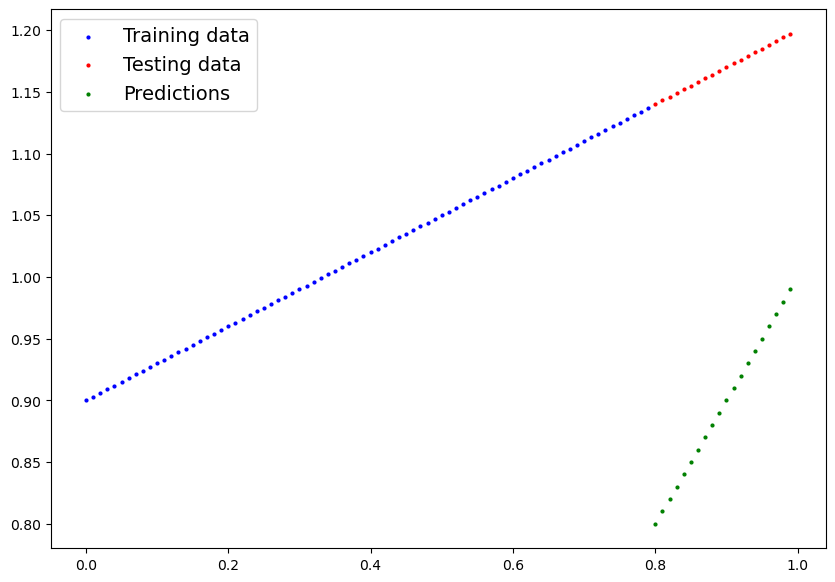

In [14]:
plot_predictions(predictions=X_test)

In [15]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_ex.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_ex.pth


In [16]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [17]:
 #1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [19]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])